In [1]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')
df.sample(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
32349,57.0,male,Associate,32365.0,37,RENT,2500.0,PERSONAL,13.48,0.08,18.0,632,No,0
13733,24.0,female,Master,101004.0,0,MORTGAGE,6000.0,DEBTCONSOLIDATION,9.32,0.06,3.0,598,No,1
38377,24.0,male,Master,133099.0,0,RENT,12000.0,PERSONAL,7.90,0.09,3.0,651,No,0
8452,26.0,male,Associate,69425.0,5,RENT,7550.0,MEDICAL,9.99,0.11,3.0,685,No,1
42020,36.0,female,Master,91097.0,15,MORTGAGE,4000.0,DEBTCONSOLIDATION,14.70,0.04,9.0,694,No,0
16447,23.0,female,Master,137685.0,2,MORTGAGE,8000.0,EDUCATION,12.68,0.06,3.0,617,Yes,0
22875,27.0,female,Bachelor,29724.0,5,RENT,8000.0,PERSONAL,11.01,0.27,8.0,644,No,1
13687,21.0,male,Master,114698.0,1,MORTGAGE,15000.0,VENTURE,11.01,0.13,2.0,706,No,0
18308,29.0,female,Associate,96845.0,9,RENT,21000.0,PERSONAL,10.99,0.22,6.0,657,No,0
32901,31.0,male,Master,58666.0,8,RENT,2000.0,HOMEIMPROVEMENT,13.74,0.03,8.0,706,Yes,0


In [3]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.shape

(45000, 14)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df_cols = list(df.columns)
cat_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
num_cols = [col for col in df_cols if col not in cat_cols]
print(f"Total columns are {len(df_cols)} {df_cols}.\n\nContinues columns are {len(num_cols)} {num_cols}.\n\nCategorical columns are {len(cat_cols)} {cat_cols}.")

Total columns are 14 ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status'].

Continues columns are 8 ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'].

Categorical columns are 6 ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status'].


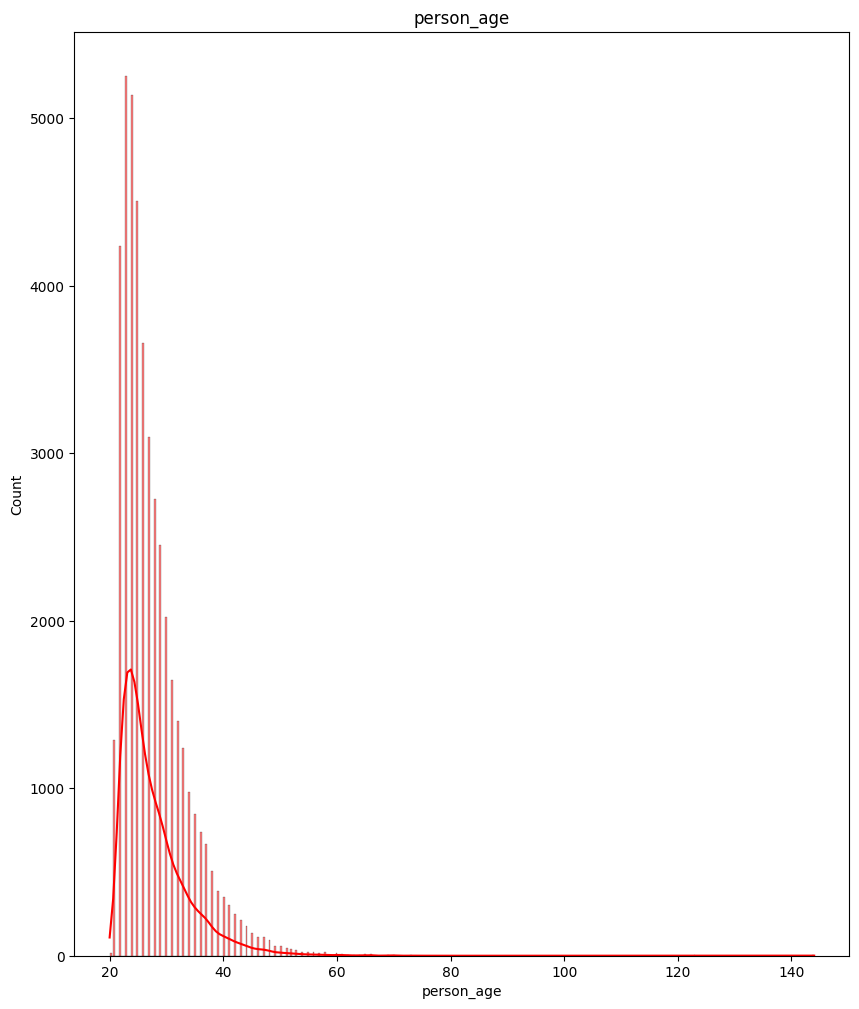

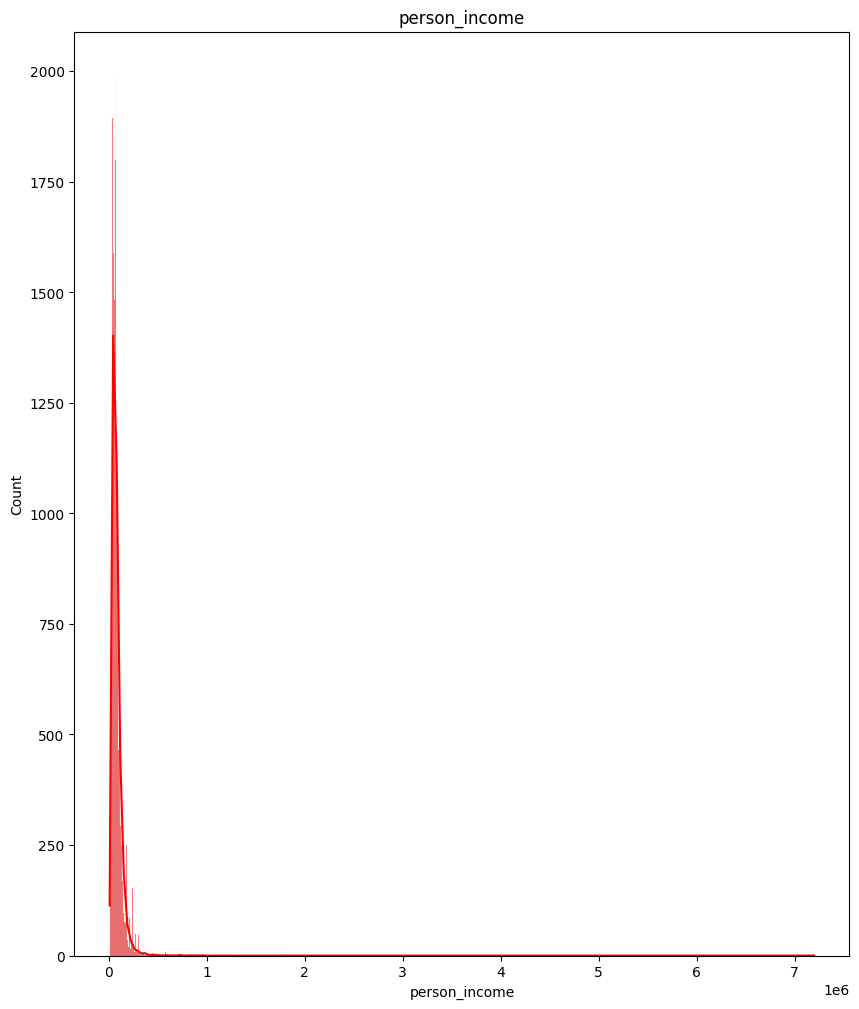

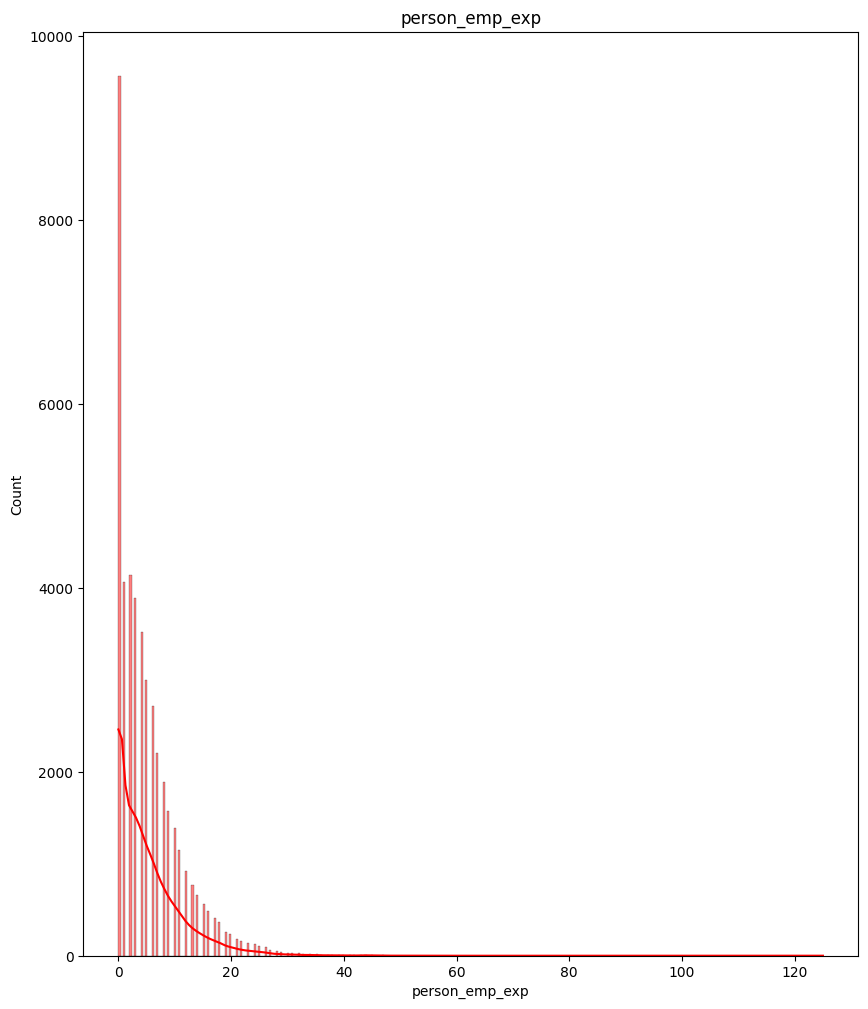

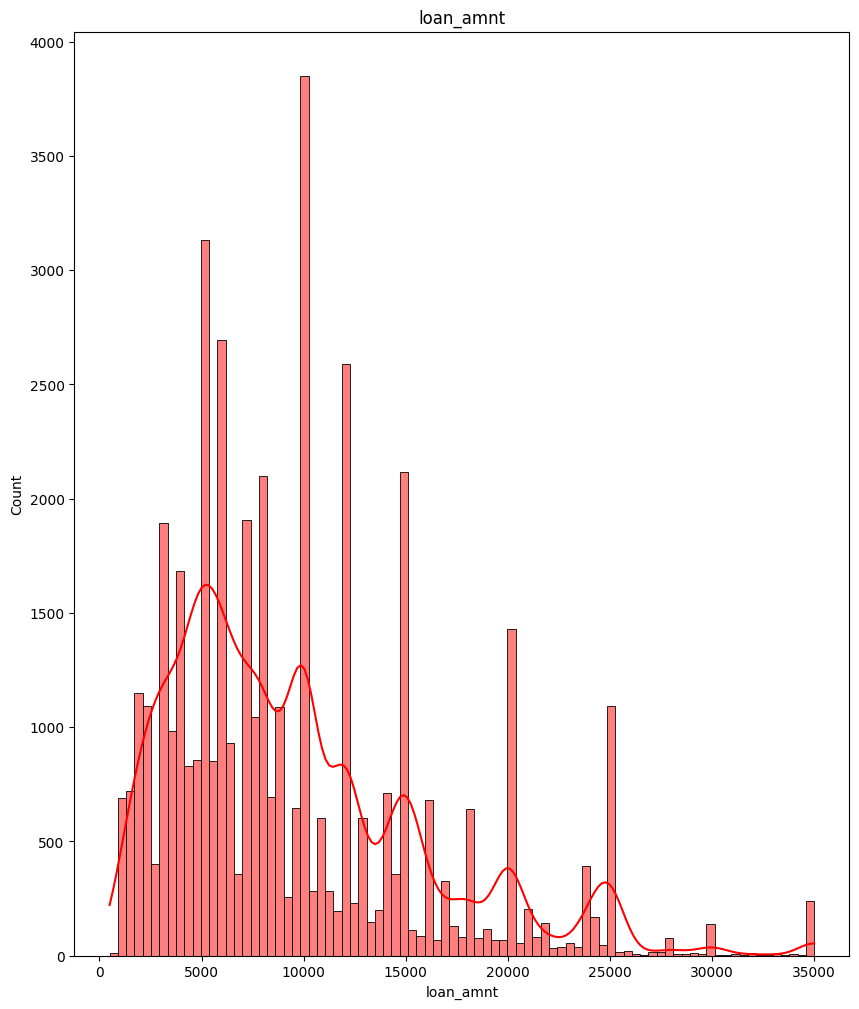

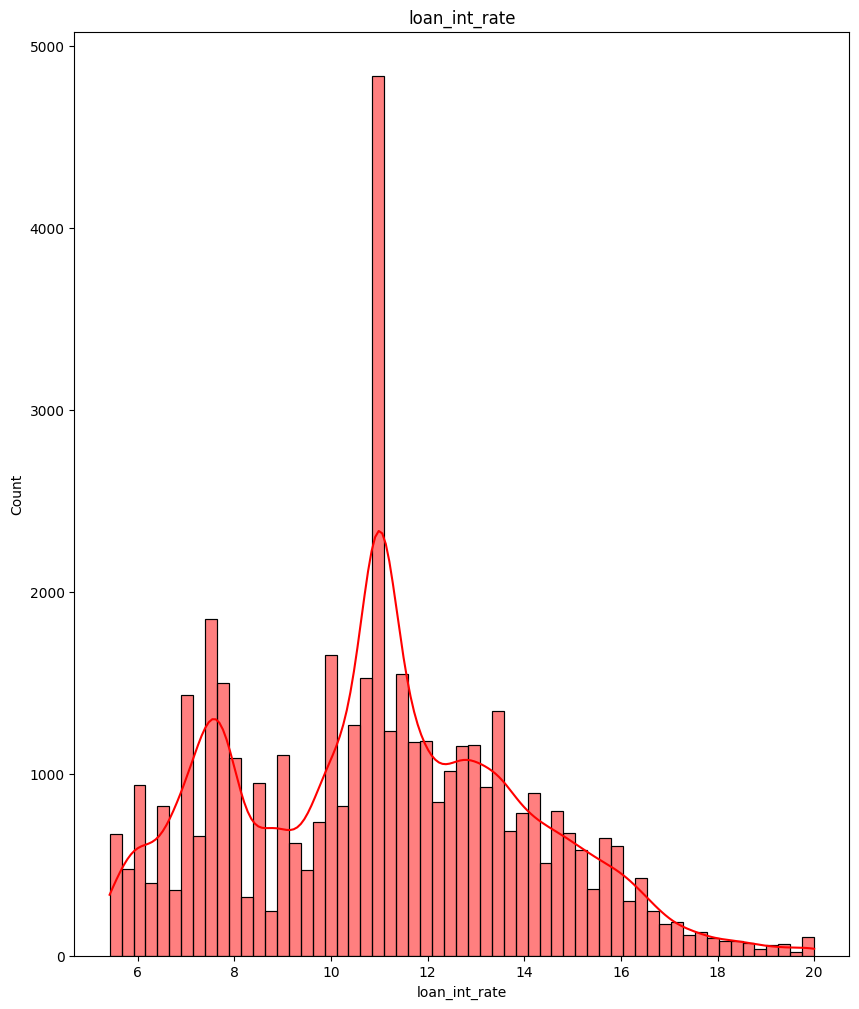

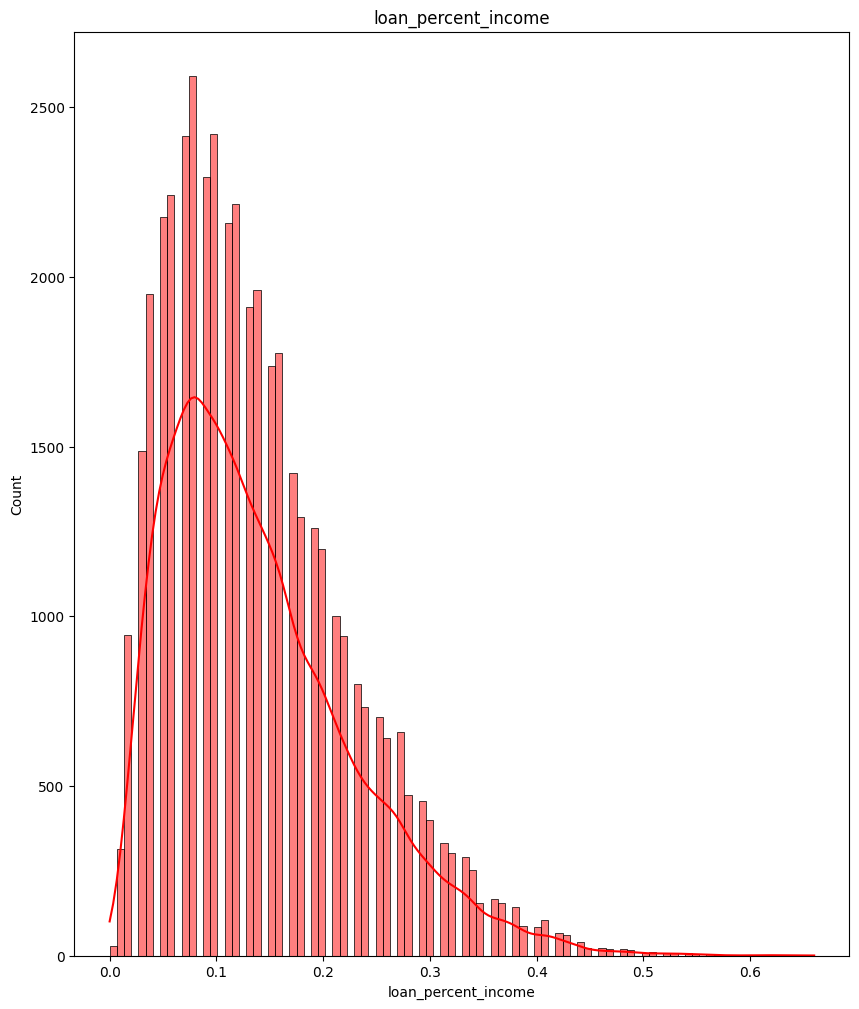

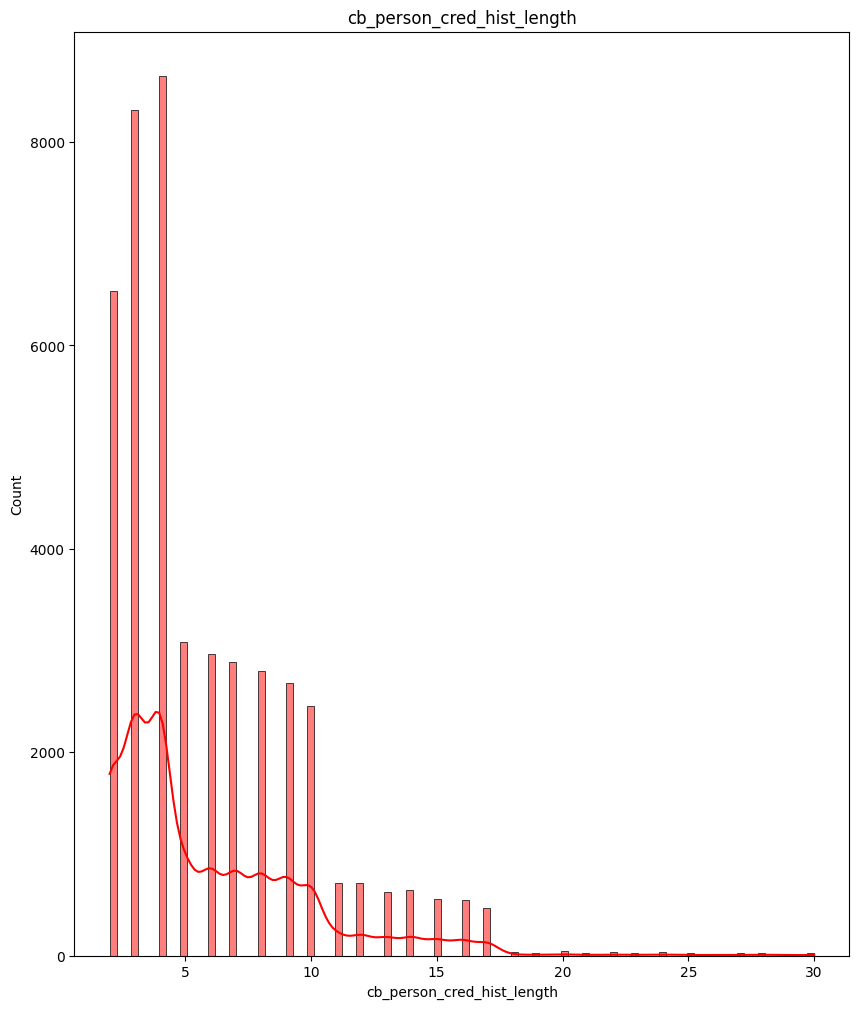

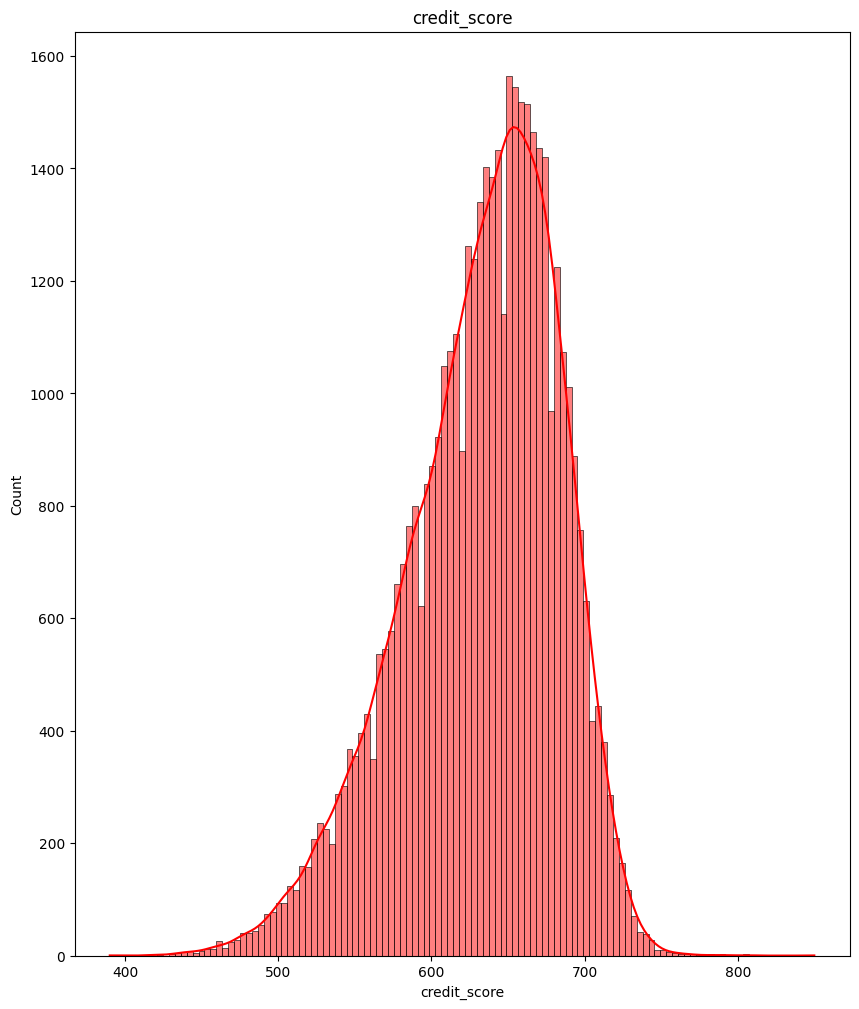

In [8]:
for col in num_cols: 
    plt.figure(figsize= (10, 12))
    plt.title(col)
    sns.histplot(df[col], kde= True, color= 'Red')
    plt.show()

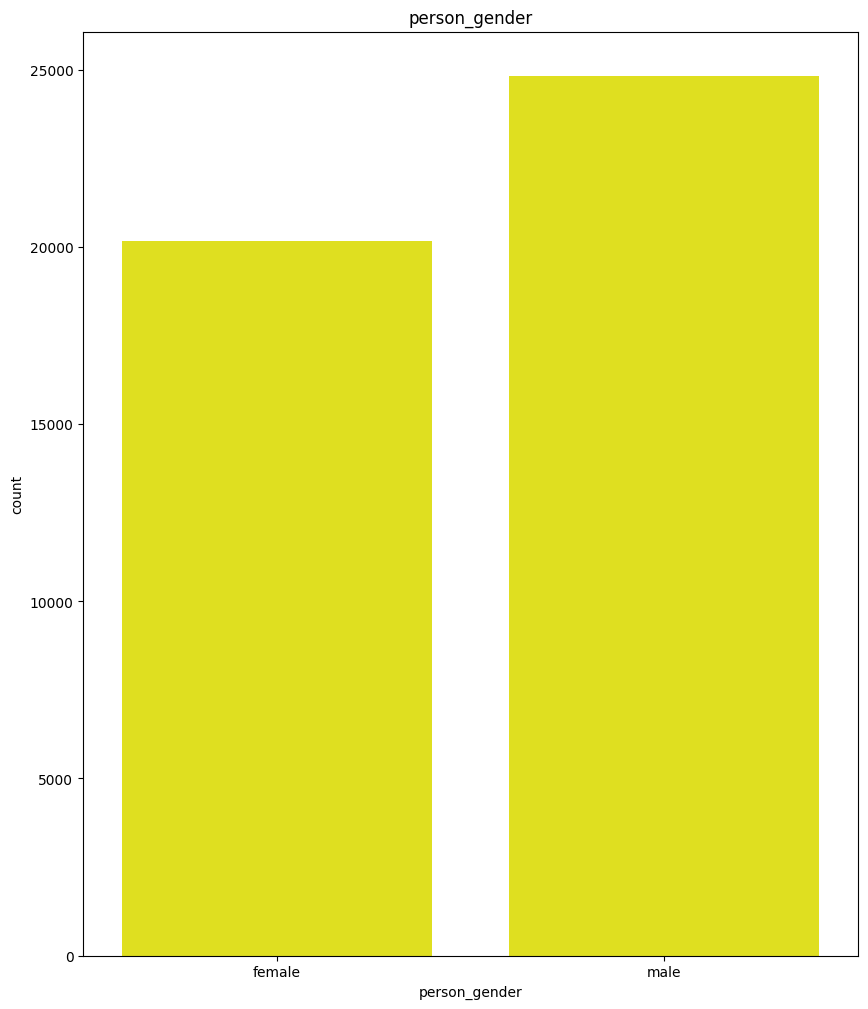

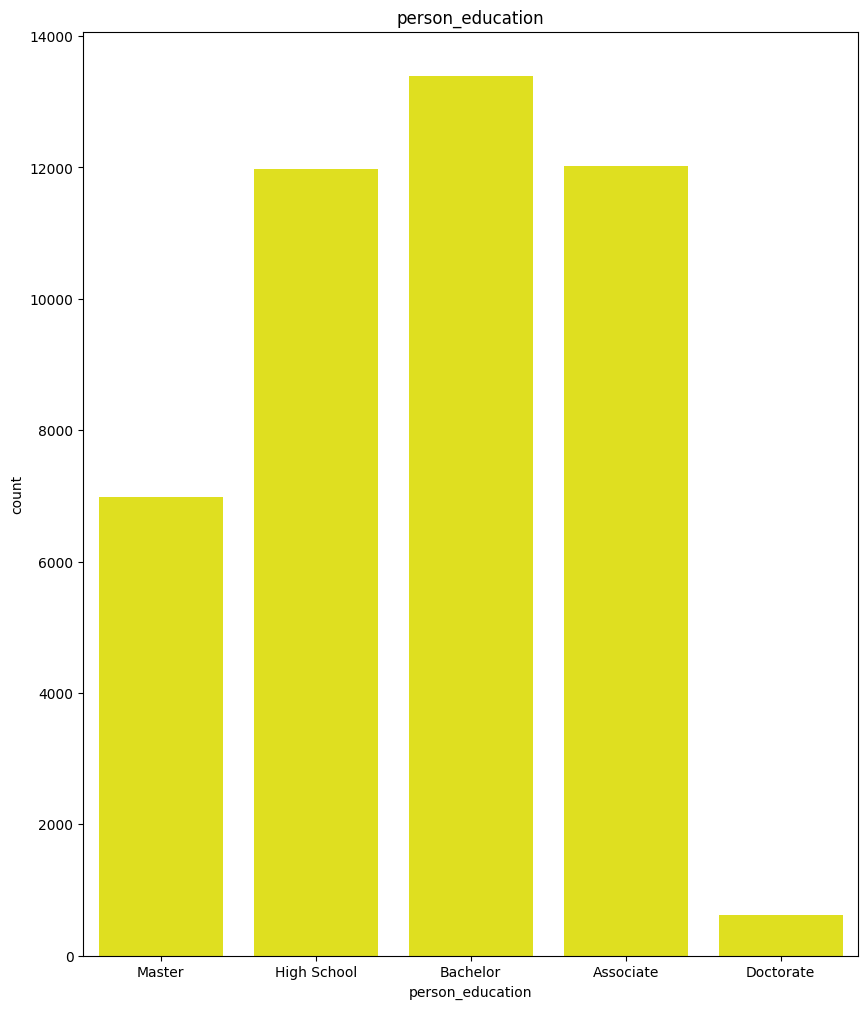

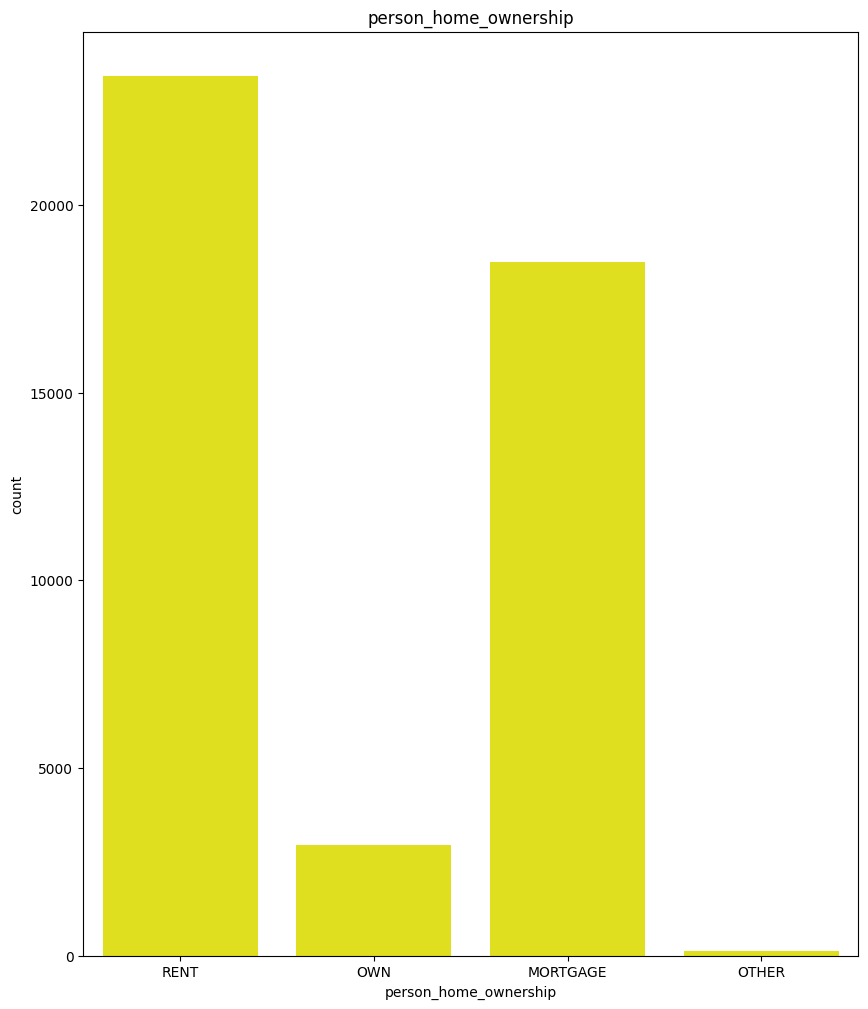

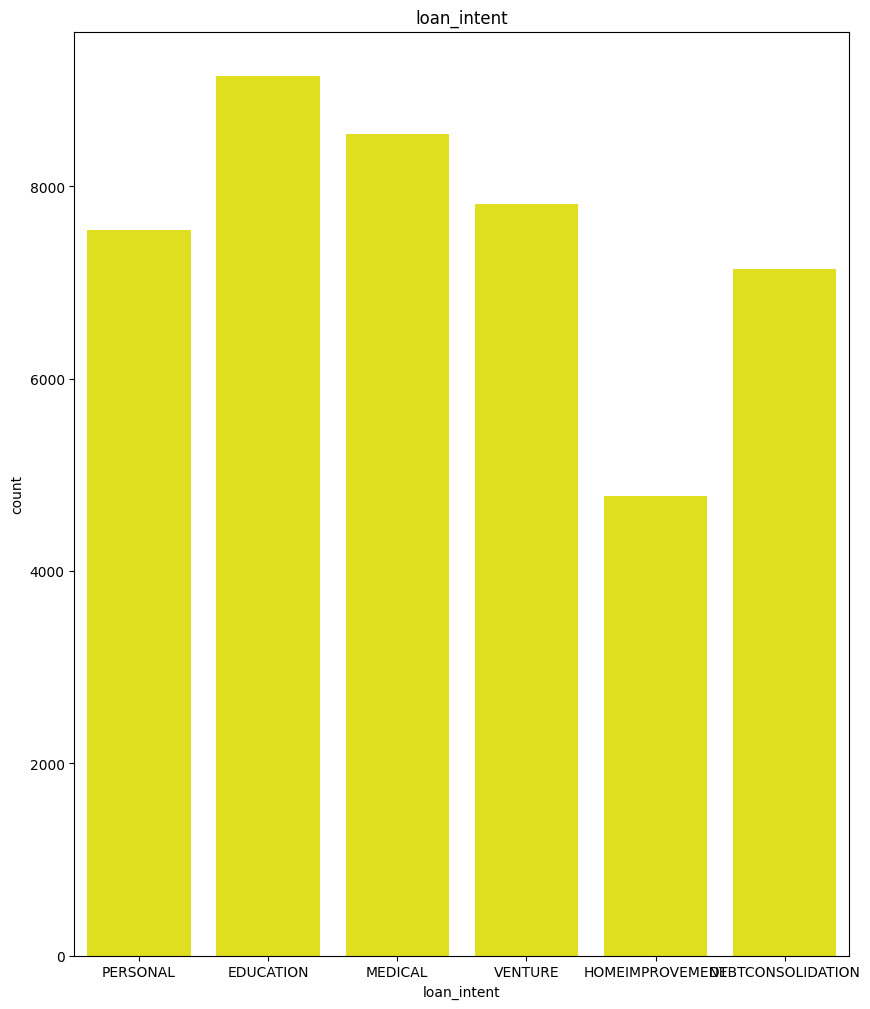

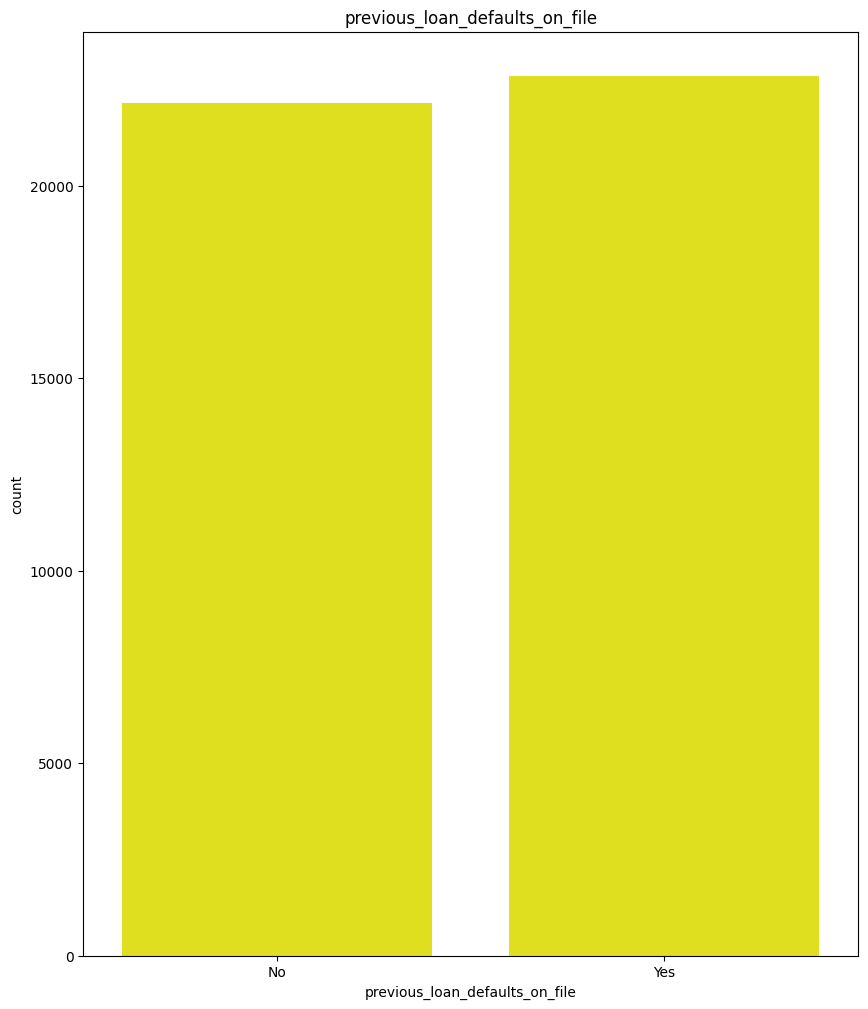

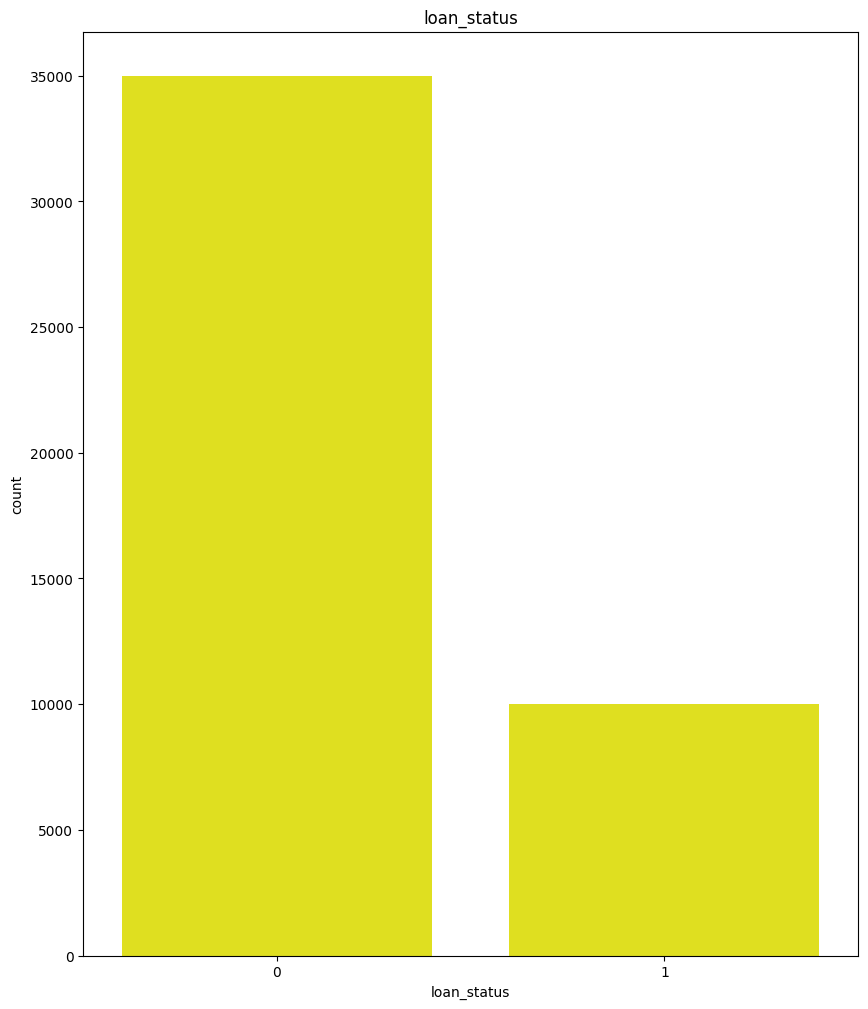

In [9]:
for col in cat_cols: 
    plt.figure(figsize= (10, 12)) 
    plt.title(col) 
    sns.countplot(x= df[col], color= 'Yellow')
    plt.show()

In [10]:
X = df.drop(['loan_status'], axis= 1) 
y = df['loan_status']

In [11]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [12]:
scaling_cols = num_cols
cat_cols.pop()
encoding_cols = cat_cols

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scaling_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop= 'first'), encoding_cols)
    ]
)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state= 42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.93


In [16]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


[[6817  173]
 [ 457 1553]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Precision: 0.8997682502896871
Recall: 0.772636815920398
F1: 0.8313704496788008
ROC-AUC: 0.8739435867870946


In [17]:
import joblib

# Save the full pipeline (preprocessing + model)
joblib.dump(model, "loan_prediction_pipeline.pkl")

print("✅ Model saved successfully as loan_prediction_pipeline.pkl")

✅ Model saved successfully as loan_prediction_pipeline.pkl
